<span style="font-size: 14pt">MIPT, Advanced ML, Spring 2018</span>

<span style="font-size: 16pt"> HW #7: CNN models

<span style="color:blue; font-size: 12pt">Sergey Kolesnikov</span>,
<span style="color:blue; font-size: 12pt; font-family: 'Verdana'"> scitator@gmail.com</span>


<h1 align="center">Organization Info</h1> 

* Дедлайн **27 апреля 2018 23:59** для всех групп.
* В качестве решения задания нужно прислать ноутбук с подробными комментариями (<span style='color:red'> без присланного решения результат контеста не будет засчитан </span>).
* <span style='color:red'>Название команды в контесте должно соответствовать шаблону: НомерГруппы_Имя_Фамилия, например, 594_Ivan_Ivanov</span>.

**Оформление дз**: 
- Присылайте выполненное задание на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2018_fall_<номер_группы>_<фамилия>``, к примеру -- ``ML2018_fall_495_ivanov``
- Выполненное дз сохраните в файл ``<фамилия>_<группа>_task<номер>.ipnb, к примеру`` -- ``ivanov_401_task7.ipnb``

**Вопросы**:
- Присылайте вопросы на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2018_fall Question <Содержание вопроса>``


--------
- **PS1:** Используются автоматические фильтры, и просто не найдем ваше дз, если вы неаккуратно его подпишите.
- **PS2:**  Просроченный дедлайн снижает максимальный вес задания по формуле, указнной на первом семинаре
- **PS3:** Допустимы исправление кода предложенного кода ниже, если вы считаете

---

<h1 align="center">Check Questions </h1> 

Ниже приводится список вопросов, с ответами на которые может быть полезно разобраться для понимания темы.

**Вопрос 1**: Чем отличаются современные сверточные сети от сетей 5 летней давности?

**Ответ: ** За последние 5 лет сети стали более глубокими. Во многом из-за того, что увеличилась вычислительная можность (научились хорошо программировать на видеокартах).

**Вопрос 2**: Какие неприятности могут возникнуть во время обучения современных нейросетей?

**Ответ: ** Современные нейронные сети переобучаются, долго учатся (даже на очень мощных машинах), а могут вообще отказать обучаться :( 


**Вопрос 3**: У вас есть очень маленький датасет из 100 картинок, классификация, но вы очень хотите использовать нейросеть, какие неприятности вас ждут и как их решить? что делать если первый вариант  решения не заработает?

**Ответ: ** Первая проблема - это маленький датасет. На малельком датасете нейросеть не будет работать правильно. Нужно увеличить датасет. Можно нанять работников, чтобы те сидели и размечали картинки, этот вариант решения вряд ли сработает, так как нужно много времени и много денег. Можно попробовать искуственно увеличить датасет, то есть к имеющимся картинкам добавить их же, но с шумом/перевернутые/отраженные/сжатые и т.д. Но тут мы пыпается выдать зависимые данные, как независимые, что так же может ничем хорошим не кончится :(

**Вопрос 4**: Можно ли сделать стайл трансфер для музыки и как?

**Ответ: ** Стайл трансфер для музыки можно свести к стайл трансферу для картинок с помощью спектрограмм (это представление музыки картинкой).

---

<h1 align="center">Theory Questions</h1> 

---

### Useful notebooks
#### Colab link (seminar): https://colab.research.google.com/drive/18xjvLspViCwTUXTBNiz_xKxlUblQuGPU
#### Colab link (hw): https://colab.research.google.com/drive/1FlYpA-JHCZ1UilPScC2zWhZNCkE3Sv78

---

# CIFAR Quest

(please read it at least diagonally)

* The ultimate quest is to create a network that has as high __accuracy__ as you can push it.
* There is a __mini-report__ at the end that you will have to fill in. We recommend reading it first and filling it while you iterate.
 
## Grading
* starting at zero points
* +2 for describing your iteration path in a report below.
* +2 for correct check questions
* +1 for beating each of these milestones on __TEST__ dataset:
    * 60% (5 total)
    * 65% (6 total)
    * 70% (7 total)
    * 75% (8 total)
    * 80% (9 total)
    * 82% (10 total)
* +2 for really cool solution:
    * 84% (12 total)
    * 86% (14 total)
    * 88% (16 total)
    * 90% (18 total)
    * 92% (20 total)
    
## Bonus points

Common ways to get bonus points are:
* Get higher score, obviously.
* Anything special about your NN. For example "A super-small/fast NN that gets 80%" gets a bonus.
* Any detailed analysis of the results. (saliency maps, whatever)

## Restrictions
* Please do __NOT__ use pre-trained networks for this assignment.
 * In other words, milestones must be beaten without pre-trained nets (and such net must be present in the e-mail).
* you __can__ use validation data for training, but you __can't'__ do anything with test data apart from running the evaluation procedure.

---

In [1]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [2]:
# Load data. It may work slow.
!mkdir cifar10
!curl -o cifar-10-python.tar.gz https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
!tar -xvzf cifar-10-python.tar.gz -C cifar10

mkdir: cannot create directory ‘cifar10’: File exists
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  162M  100  162M    0     0  9250k      0  0:00:18  0:00:18 --:--:-- 3811k
cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1


In [0]:
import _pickle as pickle
import os
import time
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
import seaborn
from IPython import display
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
%matplotlib inline

In [4]:
tf.__version__

'1.7.0'

In [5]:
tf.test.is_gpu_available()

True

In [0]:
def load_CIFAR_batch(filename):
    """ load single batch of cifar """
    with open(filename, 'rb') as f:
        datadict = pickle.load(f, encoding='iso-8859-1')
        X = datadict['data']
        Y = datadict['labels']
        X = X.reshape(10000, 3, 32, 32).astype("float32")
        Y = np.array(Y)
        return X, Y

def load_CIFAR10(ROOT):
    """ load all of cifar """
    xs = []
    ys = []
    for b in range(1,6):
        f = os.path.join(ROOT, 'data_batch_%d' % (b, ))
        X, Y = load_CIFAR_batch(f)
        xs.append(X)
        ys.append(Y)    
    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    del X, Y
    Xte, Yte = load_CIFAR_batch(os.path.join(ROOT, 'test_batch'))
    return Xtr, Ytr, Xte, Yte

In [0]:
plt.rcParams['figure.figsize'] = (10.0, 8.0) 

cifar10_dir = './cifar10/cifar-10-batches-py'
X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

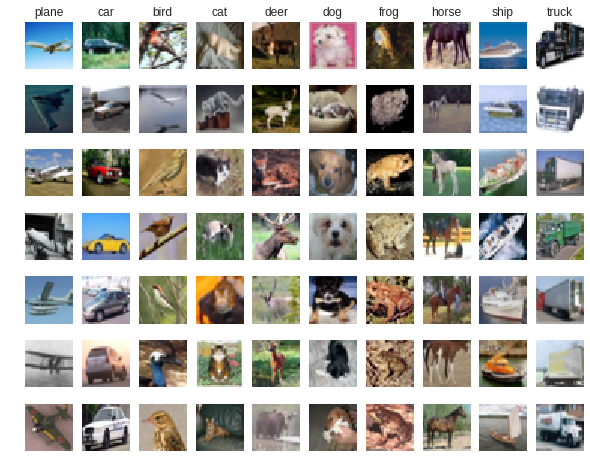

In [8]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8').transpose(1, 2, 0))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [9]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(50000, 3, 32, 32) (50000,) (10000, 3, 32, 32) (10000,)


In [0]:
size1, size2 = 32, 3

In [0]:
tf.reset_default_graph()

Сделаем и обучим нашу нейросеть так, как мы это делали на семинаре (через Estimator):

In [0]:
def cnn_model_fn(features, labels, mode):
    """Model function for CNN."""
 
    input_layer = tf.reshape(features["x"], [-1, 32, 32, 3])
    input_layer = tf.cast(input_layer, tf.float32)
   
    conv1 = tf.layers.conv2d(inputs=input_layer, filters=32, kernel_size=[3, 3], 
                             padding="same", activation=tf.nn.relu)
 
    norm1 = tf.layers.batch_normalization(conv1)
 
    conv2 = tf.layers.conv2d(inputs=norm1, filters=32, kernel_size=[3, 3],
                             padding="same", activation=tf.nn.relu)
 
    norm2 = tf.layers.batch_normalization(conv2)
 
        
    pool1 = tf.layers.max_pooling2d(inputs=norm2, pool_size=[2, 2], strides=2)
 
    dropout1 = tf.layers.dropout(inputs=pool1, rate=0.35, training=mode == tf.estimator.ModeKeys.TRAIN)
  
    conv3 = tf.layers.conv2d(inputs=dropout1, filters=64, kernel_size=[3, 3], 
                             padding="same", activation=tf.nn.relu)
 
    norm3 = tf.layers.batch_normalization(conv3)
 
    conv4 = tf.layers.conv2d(inputs=norm3, filters=64, kernel_size=[3, 3],
                             padding="same", activation=tf.nn.relu)
 
    norm4 = tf.layers.batch_normalization(conv4)
 
        
    pool2 = tf.layers.max_pooling2d(inputs=norm4, pool_size=[2, 2], strides=2)
 
    dropout2 = tf.layers.dropout(inputs=pool2, rate=0.35, training=mode == tf.estimator.ModeKeys.TRAIN) 
    
    conv5 = tf.layers.conv2d(inputs=dropout2, filters=64, kernel_size=[3, 3], 
                             padding="same", activation=tf.nn.relu)
 
    norm5 = tf.layers.batch_normalization(conv5)
 
    conv6 = tf.layers.conv2d(inputs=norm5, filters=64, kernel_size=[3, 3],
                             padding="same", activation=tf.nn.relu)
 
    norm6 = tf.layers.batch_normalization(conv6)
 
        
    pool3 = tf.layers.max_pooling2d(inputs=norm6, pool_size=[2, 2], strides=2)
 
    dropout3 = tf.layers.dropout(inputs=pool3, rate=0.5, training=mode == tf.estimator.ModeKeys.TRAIN)
 
    flat = tf.reshape(dropout3, [-1, 4 * 4 * 64])
 
    dropout4 = tf.layers.dropout(inputs=flat, rate=0.6, training=mode == tf.estimator.ModeKeys.TRAIN)
 
    logits = tf.layers.dense(inputs=dropout4, units=10)
 
    predictions = {
        "classes": tf.argmax(input=logits, axis=1)
    }
 
    # PREDICT mode
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode=mode, predictions=predictions)
 
    loss = tf.losses.sparse_softmax_cross_entropy(labels=labels, logits=logits)
 
    # TRAIN mode
    if mode == tf.estimator.ModeKeys.TRAIN:    
        optimizer = tf.train.AdamOptimizer(epsilon=0.001)
 
        train_op = optimizer.minimize(loss=loss, global_step=tf.train.get_global_step())
        return tf.estimator.EstimatorSpec(mode=mode, loss=loss, train_op=train_op)
 
    eval_metric_ops = {
        "accuracy": tf.metrics.accuracy(labels=labels, 
                                        predictions=predictions["classes"])
    }
 
    # EVAL mode
    return tf.estimator.EstimatorSpec(mode=mode, loss=loss, eval_metric_ops=eval_metric_ops)

In [14]:
estimator = tf.estimator.Estimator(model_fn=cnn_model_fn, model_dir="/tmp/cifar10/" + time.strftime("%b_%d_%H_%M_%S", time.gmtime()))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/cifar10/May_06_20_10_22', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7ff8b64a8240>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


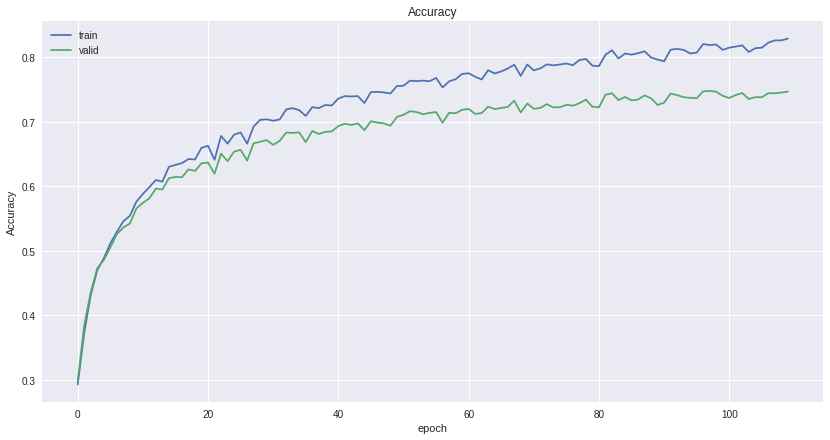

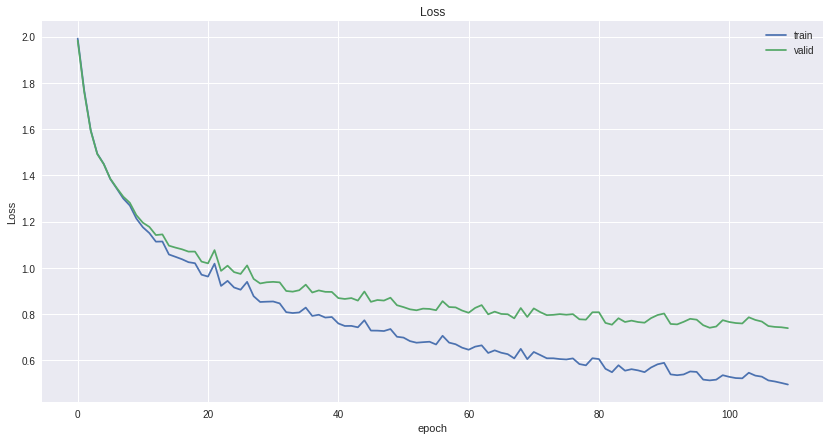

Epoch 110 of 110 took 22.463s
  train loss:		0.495369
  train accuracy:		82.88 %
  valid loss:		0.739061
  valid accuracy:		74.67 %


In [15]:
train_accuracy = []
train_loss = []
valid_accuracy = []
valid_loss = []

epochs=110
batch_size=128

X_train /= 255
X_test /= 255

train_input = tf.estimator.inputs.numpy_input_fn(x={"x": X_train}, y=y_train, batch_size=batch_size,
                                                    num_epochs=1, shuffle=True)

eval_input = tf.estimator.inputs.numpy_input_fn(x={"x": X_test}, y=y_test,
                                                       num_epochs=1, shuffle=False)

for epoch in range(epochs):
    start_time = time.time()
    
    estimator.train(input_fn=train_input)
    
    train_results = estimator.evaluate(input_fn=train_input)
    eval_results = estimator.evaluate(input_fn=eval_input)
    
    train_accuracy.append(train_results["accuracy"])
    train_loss.append(train_results["loss"])
    
    valid_accuracy.append(eval_results["accuracy"])
    valid_loss.append(eval_results["loss"])
    
    display.clear_output(wait=True)
    
    plt.figure(figsize=(14, 7))     
    plt.title("Accuracy")
    plt.xlabel("epoch")
    plt.ylabel("Accuracy")
    plt.plot(train_accuracy, label="train")
    plt.plot(valid_accuracy, label="valid")
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(14, 7))     
    plt.title("Loss")
    plt.xlabel("epoch")
    plt.ylabel("Loss")
    plt.plot(train_loss, label="train")
    plt.plot(valid_loss, label="valid")
    plt.legend()
    plt.show()
    
    print("Epoch {} of {} took {:.3f}s".format(epoch + 1, epochs, time.time() - start_time))
    print("  train loss:\t\t{:.6f}".format(train_results["loss"]))
    print("  train accuracy:\t\t{:.2f} %".format(train_results["accuracy"] * 100))
    
    print("  valid loss:\t\t{:.6f}".format(eval_results["loss"]))
    print("  valid accuracy:\t\t{:.2f} %".format(eval_results["accuracy"] * 100))

In [16]:
eval_input = tf.estimator.inputs.numpy_input_fn(x={"x": X_test}, num_epochs=1, shuffle=False)
pred = estimator.predict(input_fn=eval_input)
y_pred = np.zeros(X_test.shape[0], dtype=int)

for i, element in enumerate(list(pred)):
    y_pred[i] = element["classes"]
    
print("Final results:")
print("Accuracy: {:.2f} %".format(accuracy_score(y_test, y_pred) * 100))

if accuracy_score(y_test, y_pred) * 100 > 92.5:
    print("Achievement unlocked: mage 80 lvl")
else:
    print("Feed more!")

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/cifar10/May_06_20_10_22/model.ckpt-43010
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Final results:
Accuracy: 74.67 %
Feed more!


### Привет, меня зовут Машурин Владислав, и вот моя история:

Сначала я попытался реализоваться что-то схожее с тем, что мы делали на семинаре. Получилось не очень хорошо, так как первые разы вылезало кучу ошибок, а после сеть выдавала какие-то странные вещи. Далее я полез в интернет и начал изучать всякие туториалы, после нескольких часов их прочтения, у меня сформировалась небольшая картина, как в итоге будет сделанна эта домашка.

Реализовав и доработав один из туториалов, я сделал модель: 

conv + conv + pool + dropout + conv + conv + pool + dropout + conv + conv + pool + dropout + flatten + dense + dropout + dense + dropout + dense

Я получил скор: 10%, что очень мало. Вообще очень странно, что Accuracy как на первой эпохе стал 10%, так больше и не менялся.

Окей, идем дальше.

Попробуем следующую модель:

conv + conv + pool + dropout + conv + conv + pool + dropout + dropout + dense + dropout + dense

Я получил скор: 70%, что так же не очень хорошо. Пробуем следующую модель:

conv + norm + conv + norm + pool + dropout + conv + norm + conv + norm + pool + dropout + conv + norm + conv + norm + pool + dropout + dropout + dense + dropout + dense

Я получил скор: 74,9%. Идем дальше. Следующая модель:

conv + norm + conv + norm + pool + dropout + conv + norm + conv + norm + pool + dropout + conv + norm + conv + norm + pool + dropout + dropout + dense

Я получил скор: 74,84%

Доработав немного предыдущую модель и запустив ее еще раз, получаем скор: 75%

